## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [2]:
X, Y = make_blobs(n_samples = 500, n_features = 2, centers = 2, random_state = 10)

In [4]:
print(f'X-shape : {X.shape}')
print(f'Y-shape : {Y.shape}')

X-shape : (500, 2)
Y-shape : (500,)


## Defining Utility Functions

In [6]:
# Defining Sigmoid Function
def sigmoid(z):
    return (1.0)/(1 + np.exp(-z))

In [8]:
# Prediction funtions
def predict(X, weights):
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

In [9]:
# Loss Function
def loss(X, Y, weights):
    Y_hat = predict(X, weights)
    return np.mean(-Y*np.log(Y_hat) - (1-Y)*np.log(1-Y_hat))

In [10]:
# Update Function
def update_weights(X,Y,weights, learning_rate):
    Y_hat = predict(X,weights)
    dw = np.dot(X.T, Y_hat - Y)
    m = X.shape[0]
    weights = weights - learning_rate * dw/(float(m))
    return weights

In [20]:
# Train
def train(X,Y, learning_rate, maxEpochs : int):
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones, X))
    weights = np.zeros(X.shape[1])
    for epochs in range(maxEpochs):
        weights = update_weights(X, Y, weights, learning_rate)
        if epochs % 10 == 0:
            l = loss(X, Y, weights)
            print(f'Epoch : {epochs}, Loss : {l}')
    return weights

Epoch : 0, Loss : 0.10558359574121204
Epoch : 10, Loss : 0.026715809753442732
Epoch : 20, Loss : 0.015640576230863318
Epoch : 30, Loss : 0.01114130034901935
Epoch : 40, Loss : 0.008686925312921846
Epoch : 50, Loss : 0.007136354675277838
Epoch : 60, Loss : 0.006065721672471261
Epoch : 70, Loss : 0.0052809037066036965
Epoch : 80, Loss : 0.004680271462540817
Epoch : 90, Loss : 0.00420539565091627


<Axes: >

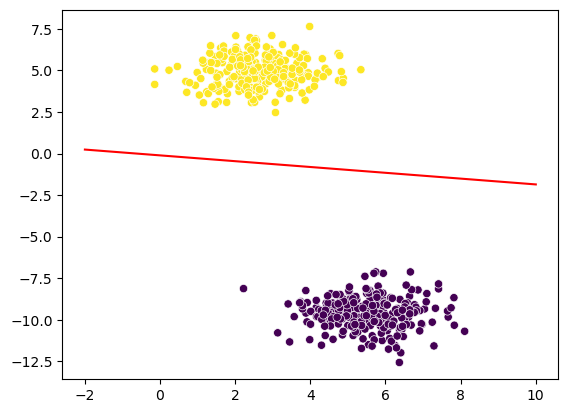

In [25]:
weight = train(X,Y,learning_rate=0.1,maxEpochs=100)
##Visualisation
x1 = np.linspace(-2,10,10)
x2 = -(weight[0] + weight[1]*x1)/weight[2]
plt.plot(x1,x2,color = 'red')
sns.scatterplot(x = X[:, 0], y = X[:,1], c = Y)